# LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import pyodbc
from datetime import date
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In this document I apply the CRISP-DM methodology to conduct the analysis and different products I want to obtained. 

# PROBLEM OR BUSINESS COMPREHENSION PHASE

## General Objective

Althought, my main objective with this or other projects is to build my own portafolio, in this specific case I want to use this database to accomplish the following analysis:

- Use the title or any other field of the table for applying web scrapping techniques to connect to Wikipedia and obtain if the Movie won any important award (such as the Oscar, Golden Globes).

- Perform some sort of unsupervised/supervised method to determine the caracteristics of the award winning movie.

## Situation Assessment

Currently, the main risk is to obtain the information of the awards, which is not currently available in this table. The idea is, with webscrapping techniques, search for this information in Wikipedia.

## DataMining Objectives

- Interact with two different sources of information. As explained before, one the sources is a database obtained from a website with a column name compose of the title of the movies. The idea is to grab each of the title movies and search their award information in Wikipedia and other info of this movies.

- With the information gathered from Wikipedia and the aforementioned RottenTomatoes database, perform different kind of analysis that the new data will allow.

- Build an Shiny app using Python.

- Use different technologies/tools to carry on the analysis. The idea was not solely downloading the CSV database and then uploading in my code in exactly the same format. The idea was to put this CSV file in a database engine (such as SQL Server) and from the code, include some SQL to interact with this table.

# DATA COMPREHENSION PHASE

## Database Connection

In [2]:
SERVER = 'DESKTOP-G1RQ1QS\SQLEXPRESS'
DATABASE = 'rotten_tomatoes_movies'

connectionString = f'DRIVER={{SQL SERVER}};SERVER={SERVER};DATABASE={DATABASE}'
conn = pyodbc.connect(connectionString)

In [3]:
sql_inicial = """
SELECT *
FROM movie_rating;
"""

In [4]:
df = pd.read_sql(sql_inicial, conn)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13048\2426569905.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_inicial, conn)


## Data description

This table has 16.638 rows and 17 columns.

In [5]:
df.shape

(16638, 17)

The columns that compose the data are the following:

- **movie_title:** title of the movie, type object or string with 0 null values.
- **movie_info:** breef summary of the movie plotline, type object. 
- **critics_consensus:** breef review of the critics opinion about the movie.
- **rating:** age category for what the movie is intended. 0 null values.
- **genre:** genre of the movie. If it's a western, adverture and so on.
- **directors:** who directed a film. 
- **writers:** whom write the story.
- **cast:** who acted on the film.
- **in_theaters_date:** opening date at the cinemas. Stored as object.
- **on_streaming_date:** date the movie arrived to any sort of streaming services. **Research more, some dates could be when the VHS/DVD was released.** Stored as object.
- **runtime_in_minuts**: how long does the movie lasts.
- **studio_name:** studio that made the movie.
- **tomatometer_status:** it's a categorization of the general consensus of the film, sum up in three categories (based upon the site https://www.rottentomatoes.com/about): 
                1. Rotten: less than 60% are positive.
                2. Fresh:  at least 60% of the reviews are positive.
                3. Certified Fresh: is a special designation awarded to the best-reviewed movies. One of the requeriments is that the tomatometer score is at least 75%.
- **tomatometer_rating:** *average score given to the film by film critics*
- **tomatometer_count:** how many critics reviewed the film.
- **audience_rating:** *average score given to the film by the audience*
- **audience_count:** how many people (non-critics) reviewed the film.

First 5 rows of the data

In [6]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minuts,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49.0,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86.0,140,64.0,11567.0
2,Vengeance (Fuk sau),"A former assassin, now a French chef, comes to...",None,R,"Action & Adventure, Art House & International,...",Johnnie To,Wai ka Fai,"Johnny Hallyday, Sylvie Testud, Anthony Wong, ...",2010-08-04,2010-11-16,108.0,IFC Films,Fresh,91.0,22,60.0,1880.0
3,10,Blake Edwards' 10 stars Dudley Moore as George...,None,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68.0,22,53.0,14670.0
4,"10,000 B.C.",A young outcast from a primitive tribe is forc...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Roland Emmerich, Harald Kloser","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,2008-06-24,109.0,Warner Bros. Pictures,Rotten,8.0,148,37.0,411087.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minuts   16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  float64
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

### Null-Values

In [8]:
df.isnull().sum()/df.shape[0] * 100

movie_title            0.000000
movie_info             0.144248
critics_consensus     50.060103
rating                 0.000000
genre                  0.102176
directors              0.685179
writers                8.107946
cast                   1.706936
in_theaters_date       4.898425
on_streaming_date      0.012021
runtime_in_minuts      0.931602
studio_name            2.500301
tomatometer_status     0.000000
tomatometer_rating     0.000000
tomatometer_count      0.000000
audience_rating        1.514605
audience_count         1.514605
dtype: float64

## EDA

### Duplicate Values

Just one row is duplicated

In [9]:
duplicateRows = df[df.duplicated()]
duplicateRows

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minuts,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
8634,King Charles III,An adaptation of the Broadway drama about Prin...,None,NR,Drama,Rupert Goold,Mike Bartlett,"Oliver Chris, Richard Goulding, Charlotte Rile...",2017-05-14,2017-06-27,88.0,None,Fresh,100.0,9,48.0,65.0


In [10]:
duplicateRows = df[df.duplicated(keep='last')]
duplicateRows

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minuts,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
8633,King Charles III,An adaptation of the Broadway drama about Prin...,None,NR,Drama,Rupert Goold,Mike Bartlett,"Oliver Chris, Richard Goulding, Charlotte Rile...",2017-05-14,2017-06-27,88.0,None,Fresh,100.0,9,48.0,65.0


Some title movies are the same, but could be that are remakes or readaptations (EG: Hamlet, Wuthering Heights) or just share the same title but are completely different movies (EG: Venom).

In [11]:
duplicateRows = df[df.duplicated(['movie_title'])]
duplicateRows

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minuts,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
227,The Matador,This heroic tale chronicles David Fandila's qu...,None,NR,"Documentary, Special Interest","Stephen Higgins, Nina Gilden Seavey",None,David Fandila,2008-03-10,2009-02-17,74.0,City Lights Pictures,Fresh,73.0,15,65.0,205.0
330,Going the Distance,Erin's (Drew Barrymore) wry wit and unfiltered...,It's timelier and a little more honest than mo...,R,"Comedy, Romance",Nanette Burstein,Geoff LaTulippe,"Drew Barrymore, Justin Long, Charlie Day, Jaso...",2010-09-03,2010-11-30,97.0,New Line Cinema,Rotten,53.0,165,52.0,57418.0
379,The Big Sleep,"Based on Raymond Chandler's novel, this remake...",None,R,"Art House & International, Drama, Mystery & Su...",Michael Winner,Michael Winner,"Robert Mitchum, Sarah Miles, Richard Boone, Ol...",None,2000-08-22,99.0,United Artists,Fresh,67.0,6,26.0,1460.0
431,Cat People,In this loose adaptation of the 1942 horror cl...,Paul Schrader's kinky reimagining of Cat Peopl...,R,"Drama, Horror, Mystery & Suspense",Paul Schrader,"Alan Ormsby, Paul Schrader, DeWitt Bodeen, Wal...","Nastassja Kinski, Malcolm McDowell, John Heard...",1982-04-02,2000-10-10,119.0,Universal Pictures,Fresh,61.0,46,45.0,10326.0
473,Day of the Dead,Flesh-eating zombies close in on a handful of ...,Day of the Dead may arguably be the least haun...,NR,Horror,George A. Romero,George A. Romero,"Lori Cardille, Terry Alexander, Joseph Pilato,...",1985-07-03,1998-11-10,96.0,United Film Distribution Compa,Fresh,83.0,36,75.0,64488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16308,Wild Bill,"Out on parole after 8 years inside, Bill Haywa...",None,NR,"Art House & International, Drama",Dexter Fletcher,"Dexter Fletcher, Danny King","Charlie Creed-Miles, Will Poulter, Sammy Willi...",2011-01-01,2013-07-16,98.0,Cinedigm,Fresh,100.0,26,82.0,7300.0
16417,Wolves,"Anthony (Taylor John Smith, American Crime, HB...",None,R,Drama,Bart Freundlich,Bart Freundlich,"Michael Shannon, Carla Gugino, Taylor John Smi...",2017-03-03,2017-08-08,110.0,IFC Films,Rotten,33.0,27,47.0,149.0
16439,Wonder Woman,An Amazon princess (Gal Gadot) finds her idyll...,"Thrilling, earnest, and buoyed by Gal Gadot's ...",PG-13,"Action & Adventure, Drama, Science Fiction & F...",Patty Jenkins,"Allan Heinberg, Geoff Johns","Gal Gadot, Chris Pine, Connie Nielsen, Robin W...",2017-06-02,2017-09-19,141.0,Warner Bros. Pictures,Certified Fresh,93.0,438,88.0,128448.0
16488,Wuthering Heights,"The 1992 adaptation of ""Emily Bronte's Wutheri...",None,PG,"Drama, Romance",Peter Kosminsky,Anne Devlin,"Juliette Binoche, Ralph Fiennes, Janet McTeer,...",None,2003-12-02,105.0,Paramount Pictures,Rotten,33.0,9,66.0,9800.0


### Categorical variables

#### Critics consensus

In [12]:
critics_consensus_count = pd.crosstab(index=df["critics_consensus"],columns = "n", colnames=[""])
critics_consensus_count                                                                                         

,n
critics_consensus,
"'Tween girls will enjoy this sugar coated fluff, but others will find Sleepover a snooze.",1
100 Streets strands its talented cast - led by a clearly overqualified Idris Elba - in the midst of a well-meaning but fatally contrived drama.,1
"12 Strong has a solid cast, honorable intentions, and a thrilling, fact-based story - all of which are occasionally enough to balance a disappointing lack of depth or nuance.",1
"13 Hours: The Secret Soldiers of Benghazi is a comparatively mature and restrained effort from Michael Bay, albeit one that can't quite boast the impact its fact-based story deserves.",1
"13 Sins may be derivative of other horror films that made their moral points with more finesse, but it atones with a grim sense of humor and sleek style.",1
...,...
"[REC] 3 Genesis discards the handheld POV of its predecessors and loses the franchise's fresh perspective in the bargain, upping the gags and gore to the detriment of the chills that audiences crave.",1
"dot the i starts out as a standard love triangle, but last minute revelations turn the movie into a gimmick.",1
"iBoy's original premise and Maisie Williams' strong performance aren't enough to overwrite a clich├®d narrative, too-serious tone, and overall glitchy execution.",1


If the field `critics_consensus` is empty, it appears as `None` in the printed tables

In [13]:
df_critics = df[df.critics_consensus.isnull()]
df_critics.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minuts,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
2,Vengeance (Fuk sau),"A former assassin, now a French chef, comes to...",None,R,"Action & Adventure, Art House & International,...",Johnnie To,Wai ka Fai,"Johnny Hallyday, Sylvie Testud, Anthony Wong, ...",2010-08-04,2010-11-16,108.0,IFC Films,Fresh,91.0,22,60.0,1880.0
3,10,Blake Edwards' 10 stars Dudley Moore as George...,None,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68.0,22,53.0,14670.0
8,3:10 to Yuma,"Desperate for money, frontier rancher Van Hefl...",None,NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,2002-04-02,92.0,Columbia Pictures,Fresh,96.0,27,78.0,9224.0
9,Charly (A Heartbeat Away),Sam Roberts thinks he has all the answers: the...,None,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,2003-08-01,103.0,Excel Entertainment,Rotten,20.0,10,87.0,4819.0
10,Abraham Lincoln,"To date, this D.W. Griffith epic is the only t...",None,NR,"Classics, Drama",D.W. Griffith,"Gerrit J. Lloyd, Stephen Vincent Ben├®t","Walter Huston, Una Merkel, Kay Hammond, Ian Ke...",1930-11-08,2008-11-18,97.0,United Artists,Fresh,90.0,10,38.0,455.0


#### Tomatometer status

In [14]:
tomatometer_status_count = pd.crosstab(index=df["tomatometer_status"], columns="n", colnames=[""])
tomatometer_status_count

,n
tomatometer_status,
Certified Fresh,2957
Fresh,6448
Rotten,7233


#### Rating

In [15]:
rating_count = pd.crosstab(index=df["rating"], columns="n", colnames=[""])
rating_count

,n
rating,
G,652
NC17,37
NR,4862
PG,2062
PG-13,2885
PG-13),3
R,6136
R),1


Some ratings categories have errors: such as PG-13) and R), that include a parenthesis at the end. 

#### Studio Name

In [16]:
studio_name_count = pd.crosstab(index=df["studio_name"], columns="n", colnames=[""])
studio_name_count

,n
studio_name,
10 West Studios,1
108 Pics,1
1091,1
120 Degree Films,1
1428 Films,1
...,...
eRealBiz,2
iHQ,1
levelFILM,2


### Numerical variables

Some aspects to review:

- runtime_in_minuts: has 1 minute to 2000 minutes. Check if they are about a short film or a tv-series, or a trilogy.

- audience_count: check why it was presented with commas and it looks different from the other numerical values. 

In [17]:
df.describe()

,runtime_in_minuts,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,16483.000000,16638.000000,16638.000000,16386.000000,1.638600e+04
mean,102.391494,60.466522,56.607104,60.470829,1.524797e+05
std,25.028011,28.587230,66.383800,20.462368,1.817736e+06
min,1.000000,0.000000,5.000000,0.000000,5.000000e+00
25%,90.000000,38.000000,12.000000,45.000000,8.642500e+02
50%,99.000000,66.000000,28.000000,62.000000,4.876500e+03
75%,111.000000,86.000000,76.000000,77.000000,2.875200e+04
max,2000.000000,100.000000,497.000000,100.000000,3.579764e+07


In [18]:
df.dropna().describe()

,runtime_in_minuts,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,7610.000000,7610.000000,7610.000000,7610.000000,7.610000e+03
mean,106.319974,61.312352,101.143101,62.987385,3.197788e+05
std,19.560031,27.638312,72.922055,19.546161,2.657350e+06
min,1.000000,0.000000,5.000000,6.000000,5.000000e+00
25%,94.000000,39.000000,44.000000,48.000000,6.042000e+03
50%,103.000000,67.000000,80.000000,65.000000,2.523550e+04
75%,116.000000,86.000000,141.000000,79.000000,9.480075e+04
max,333.000000,100.000000,497.000000,100.000000,3.579764e+07


### Boxplot

Here I like to plot the numerical variables before any type of transformation. Clearly, it's neccessary to convert all the variables to the same scale. It is important to remember that `audience_count` measures how many people see the film, therefore it's logical that their data have higher values than the rest of the other variables. Also, it is clearly the presence of outliers, so probably this consist of movies that had huge box office records (such as Avengers End Game, Titanic, Avatar).

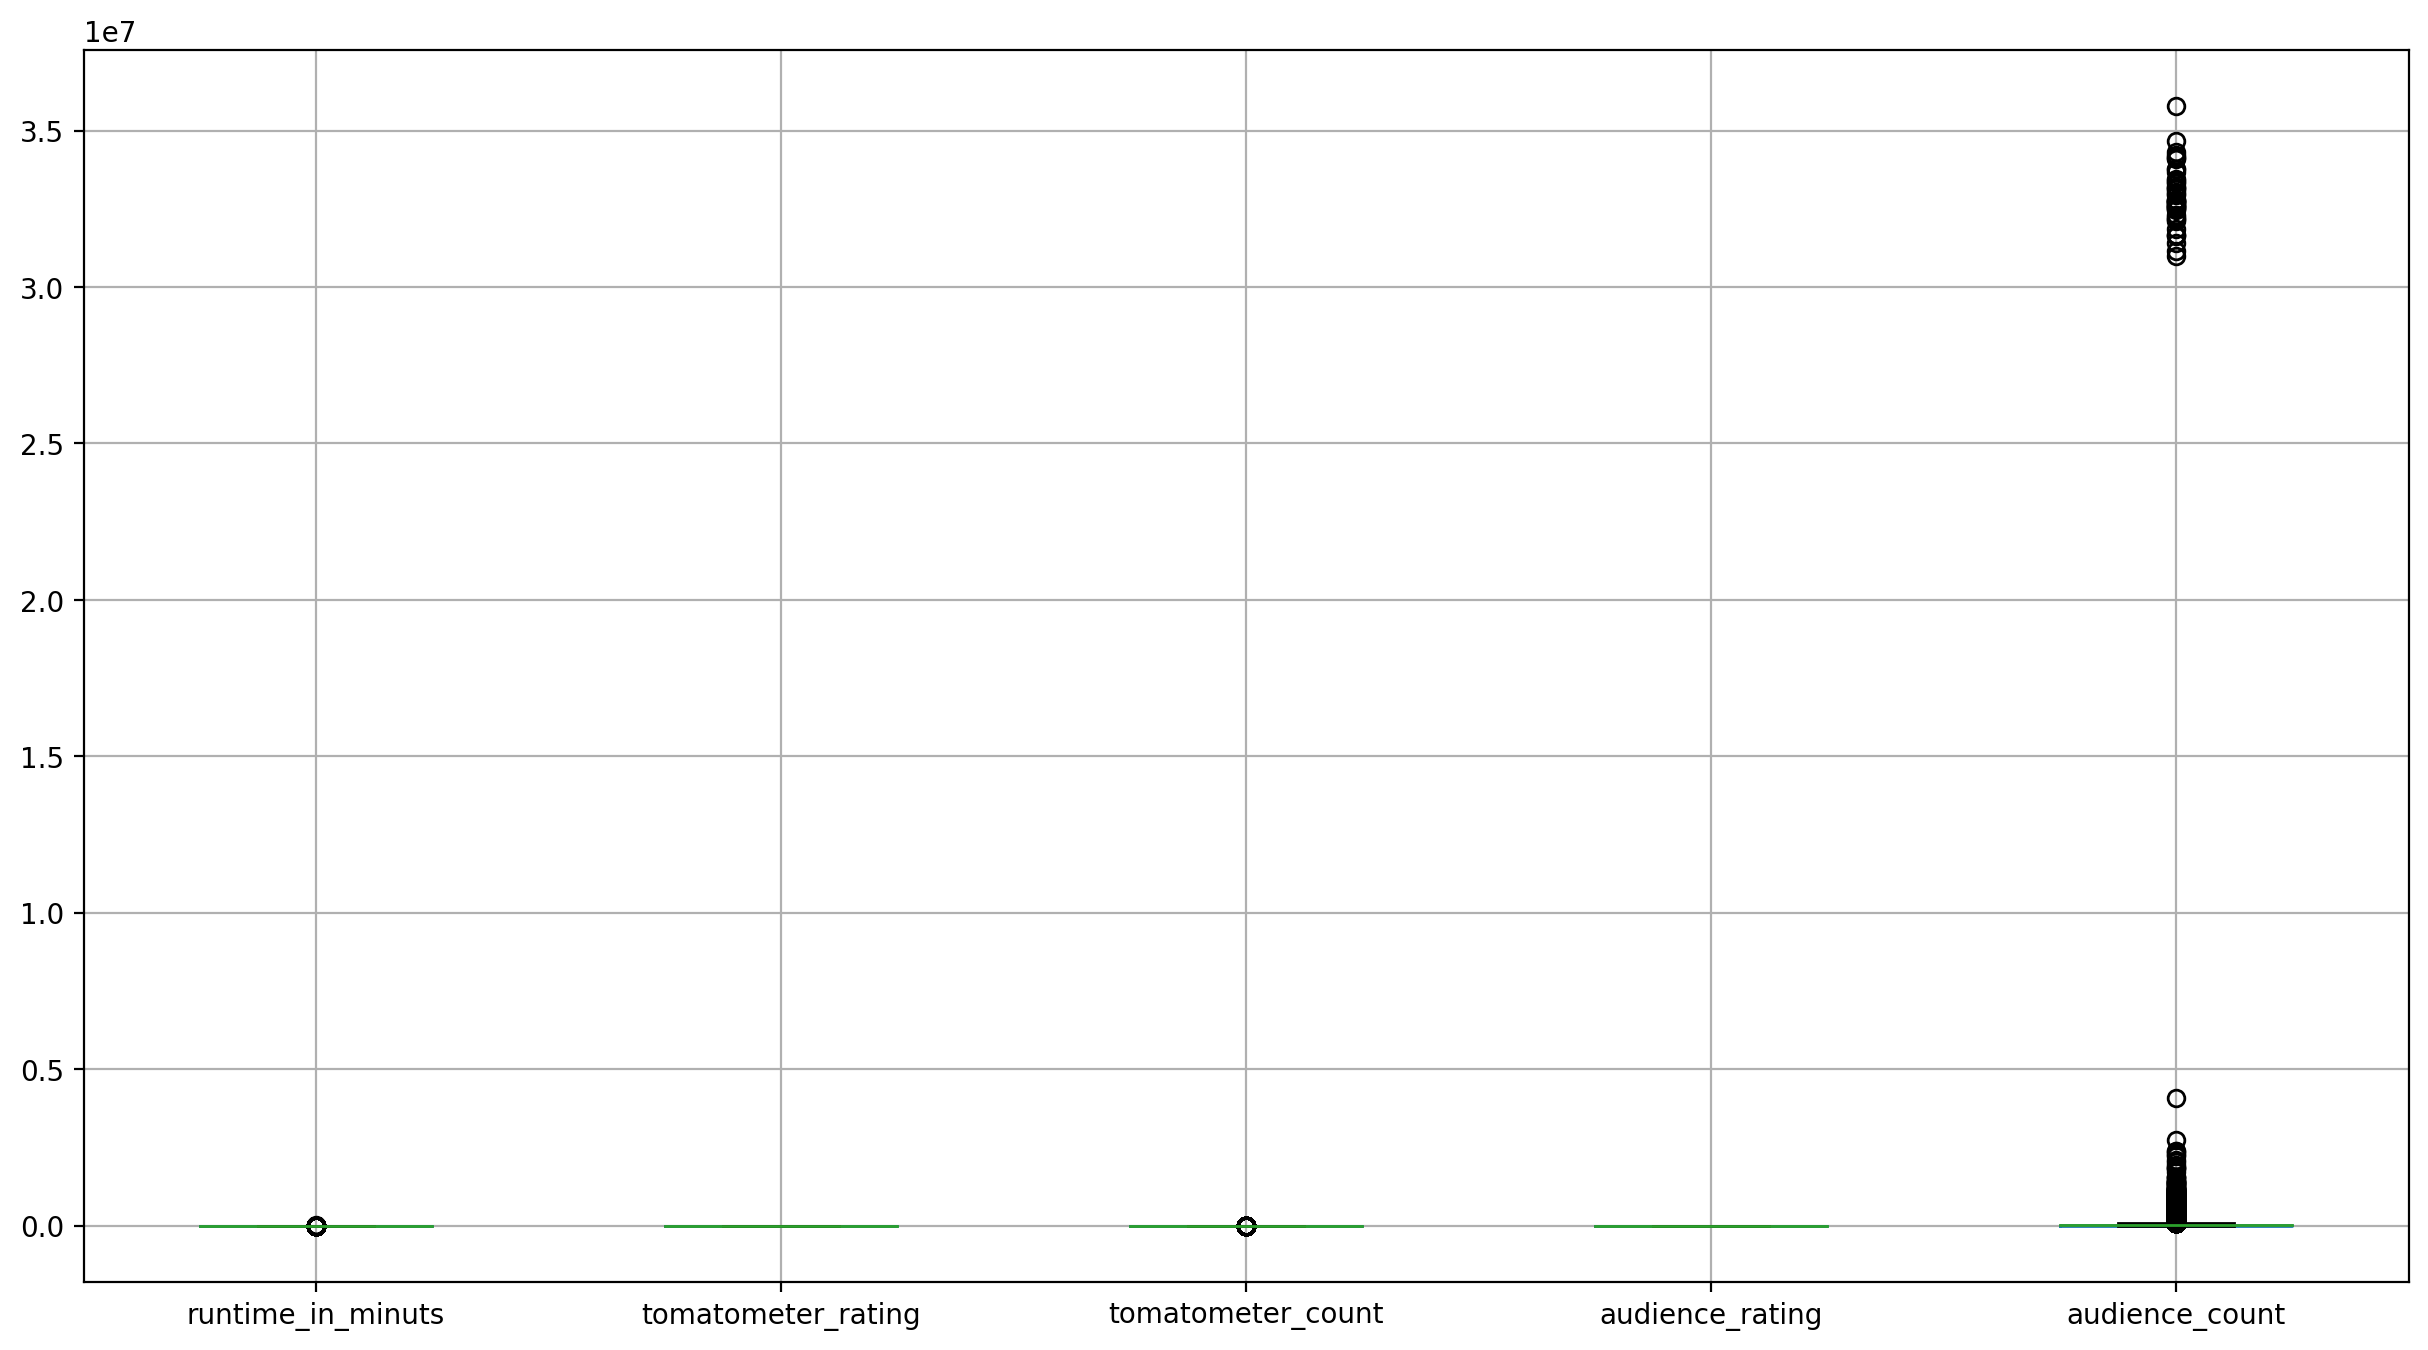

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,8), dpi = 200)
boxplots = df.boxplot(return_type='axes',ax=ax)
plt.show()

In [25]:
#df_max_runtime = df[df.runtime_in_minuts != 2000]
#hb_num = df_max_runtime.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])
hb_num = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])

## Standard

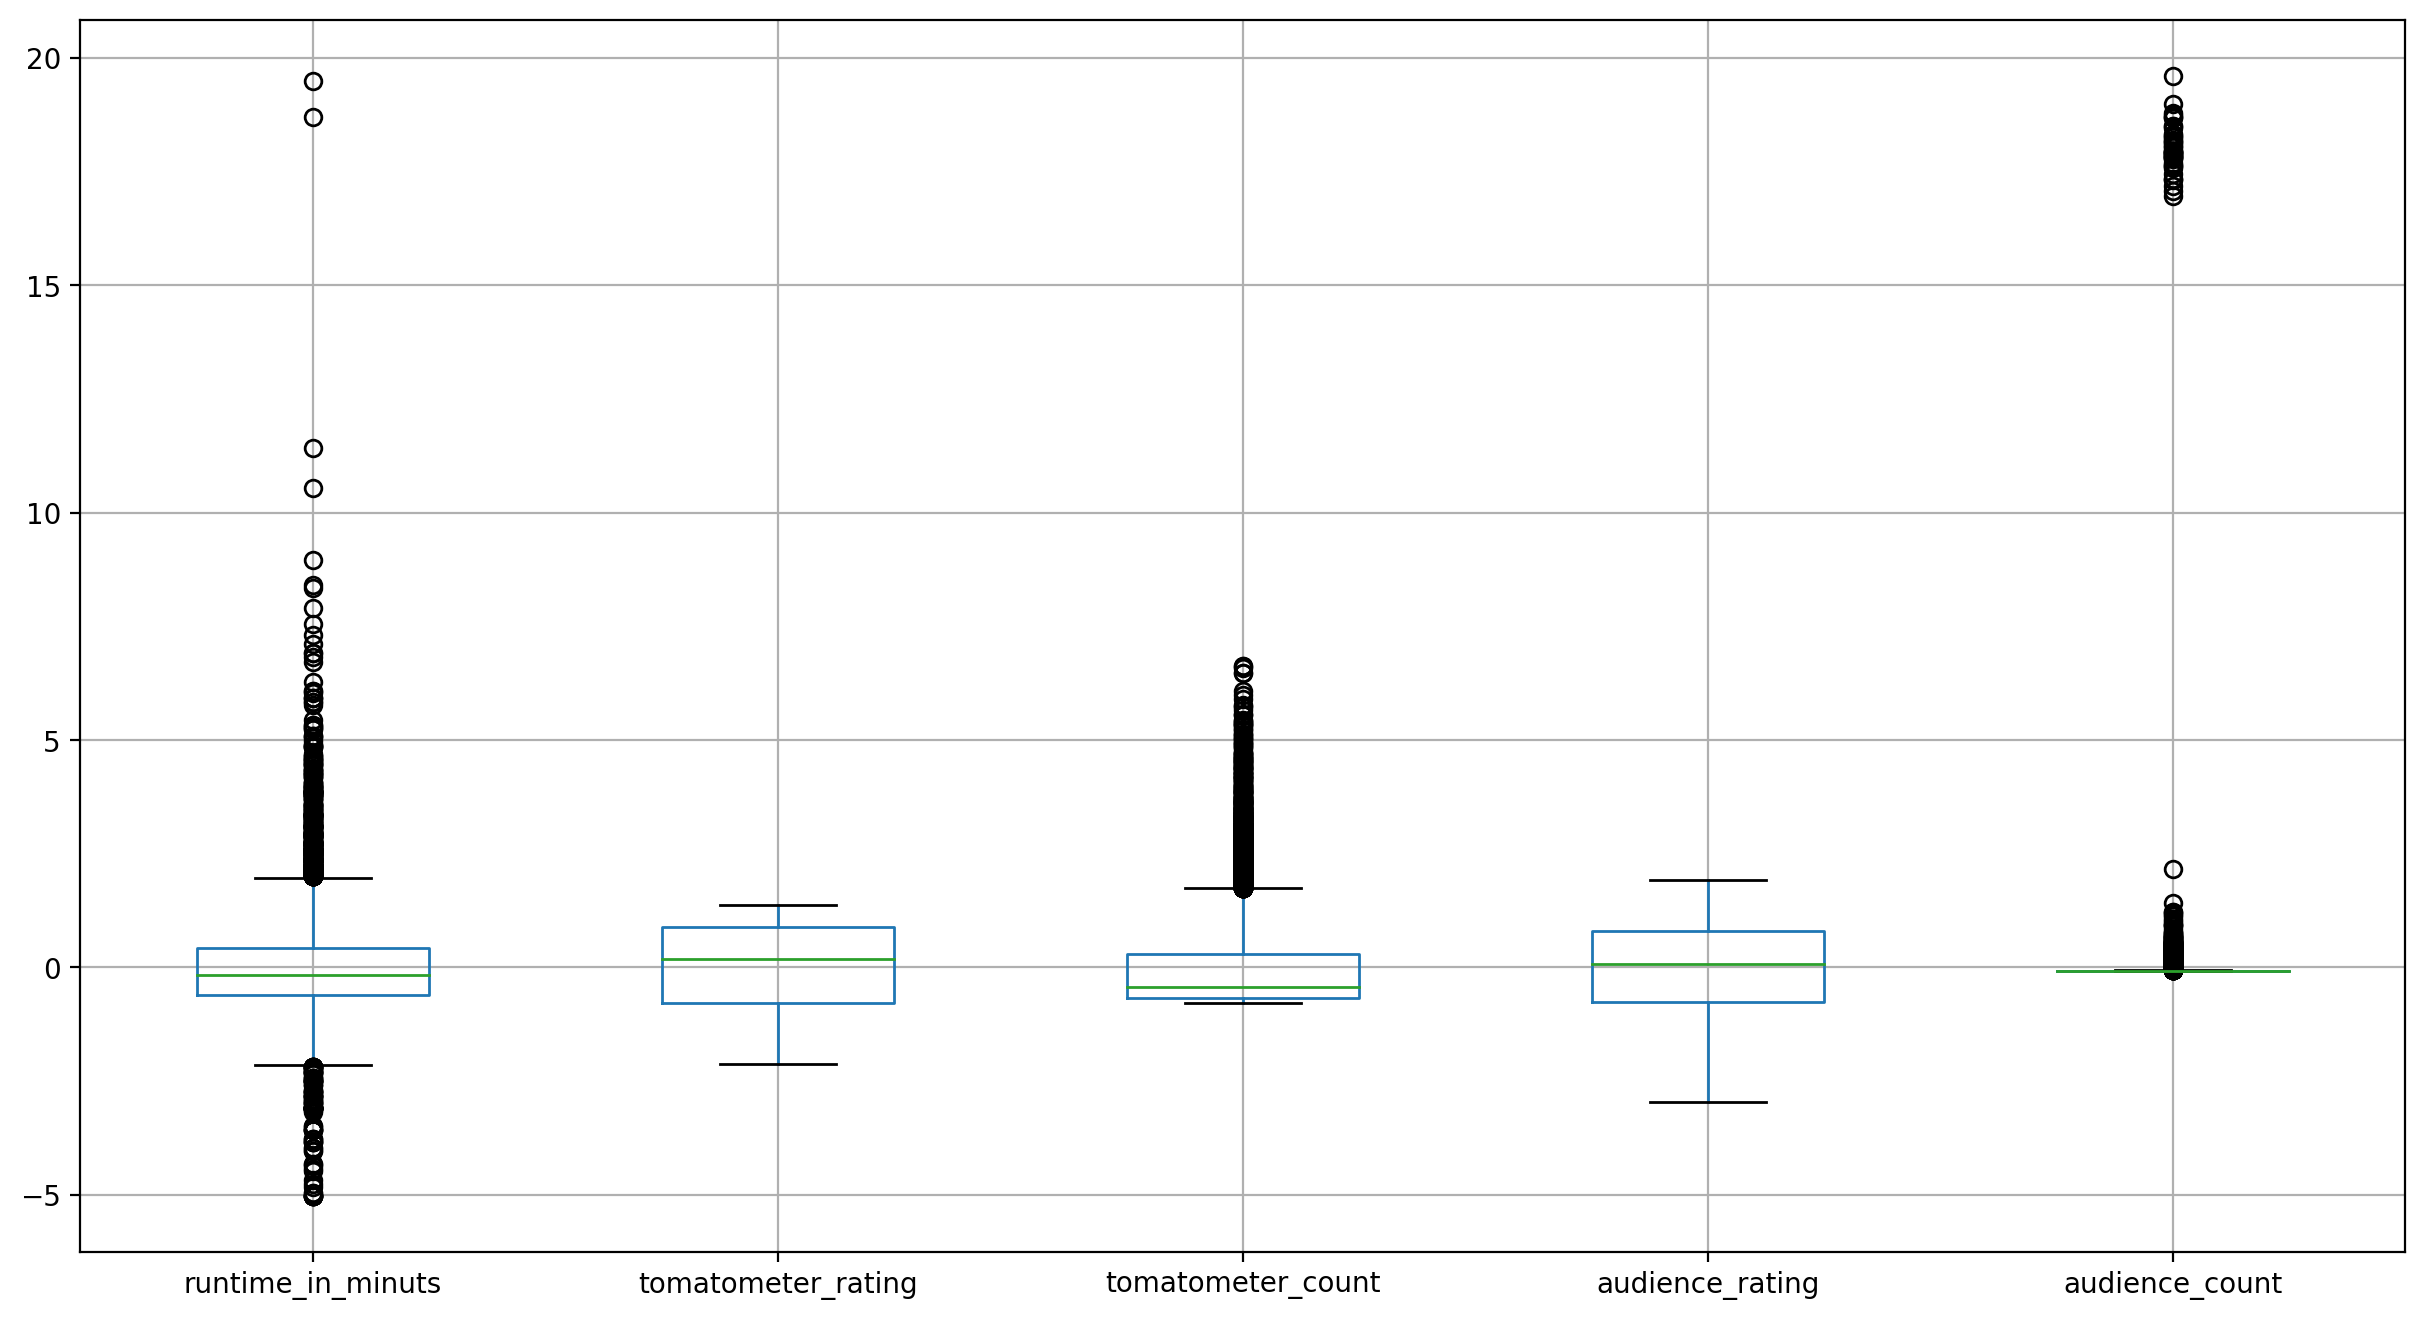

In [27]:
hb_num_scaled = pd.DataFrame(StandardScaler().fit_transform(hb_num),columns=hb_num.columns,index = hb_num.index)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,8), dpi = 200)
boxplots = hb_num_scaled.boxplot(return_type='axes',ax=ax)
plt.show()

## Normalization

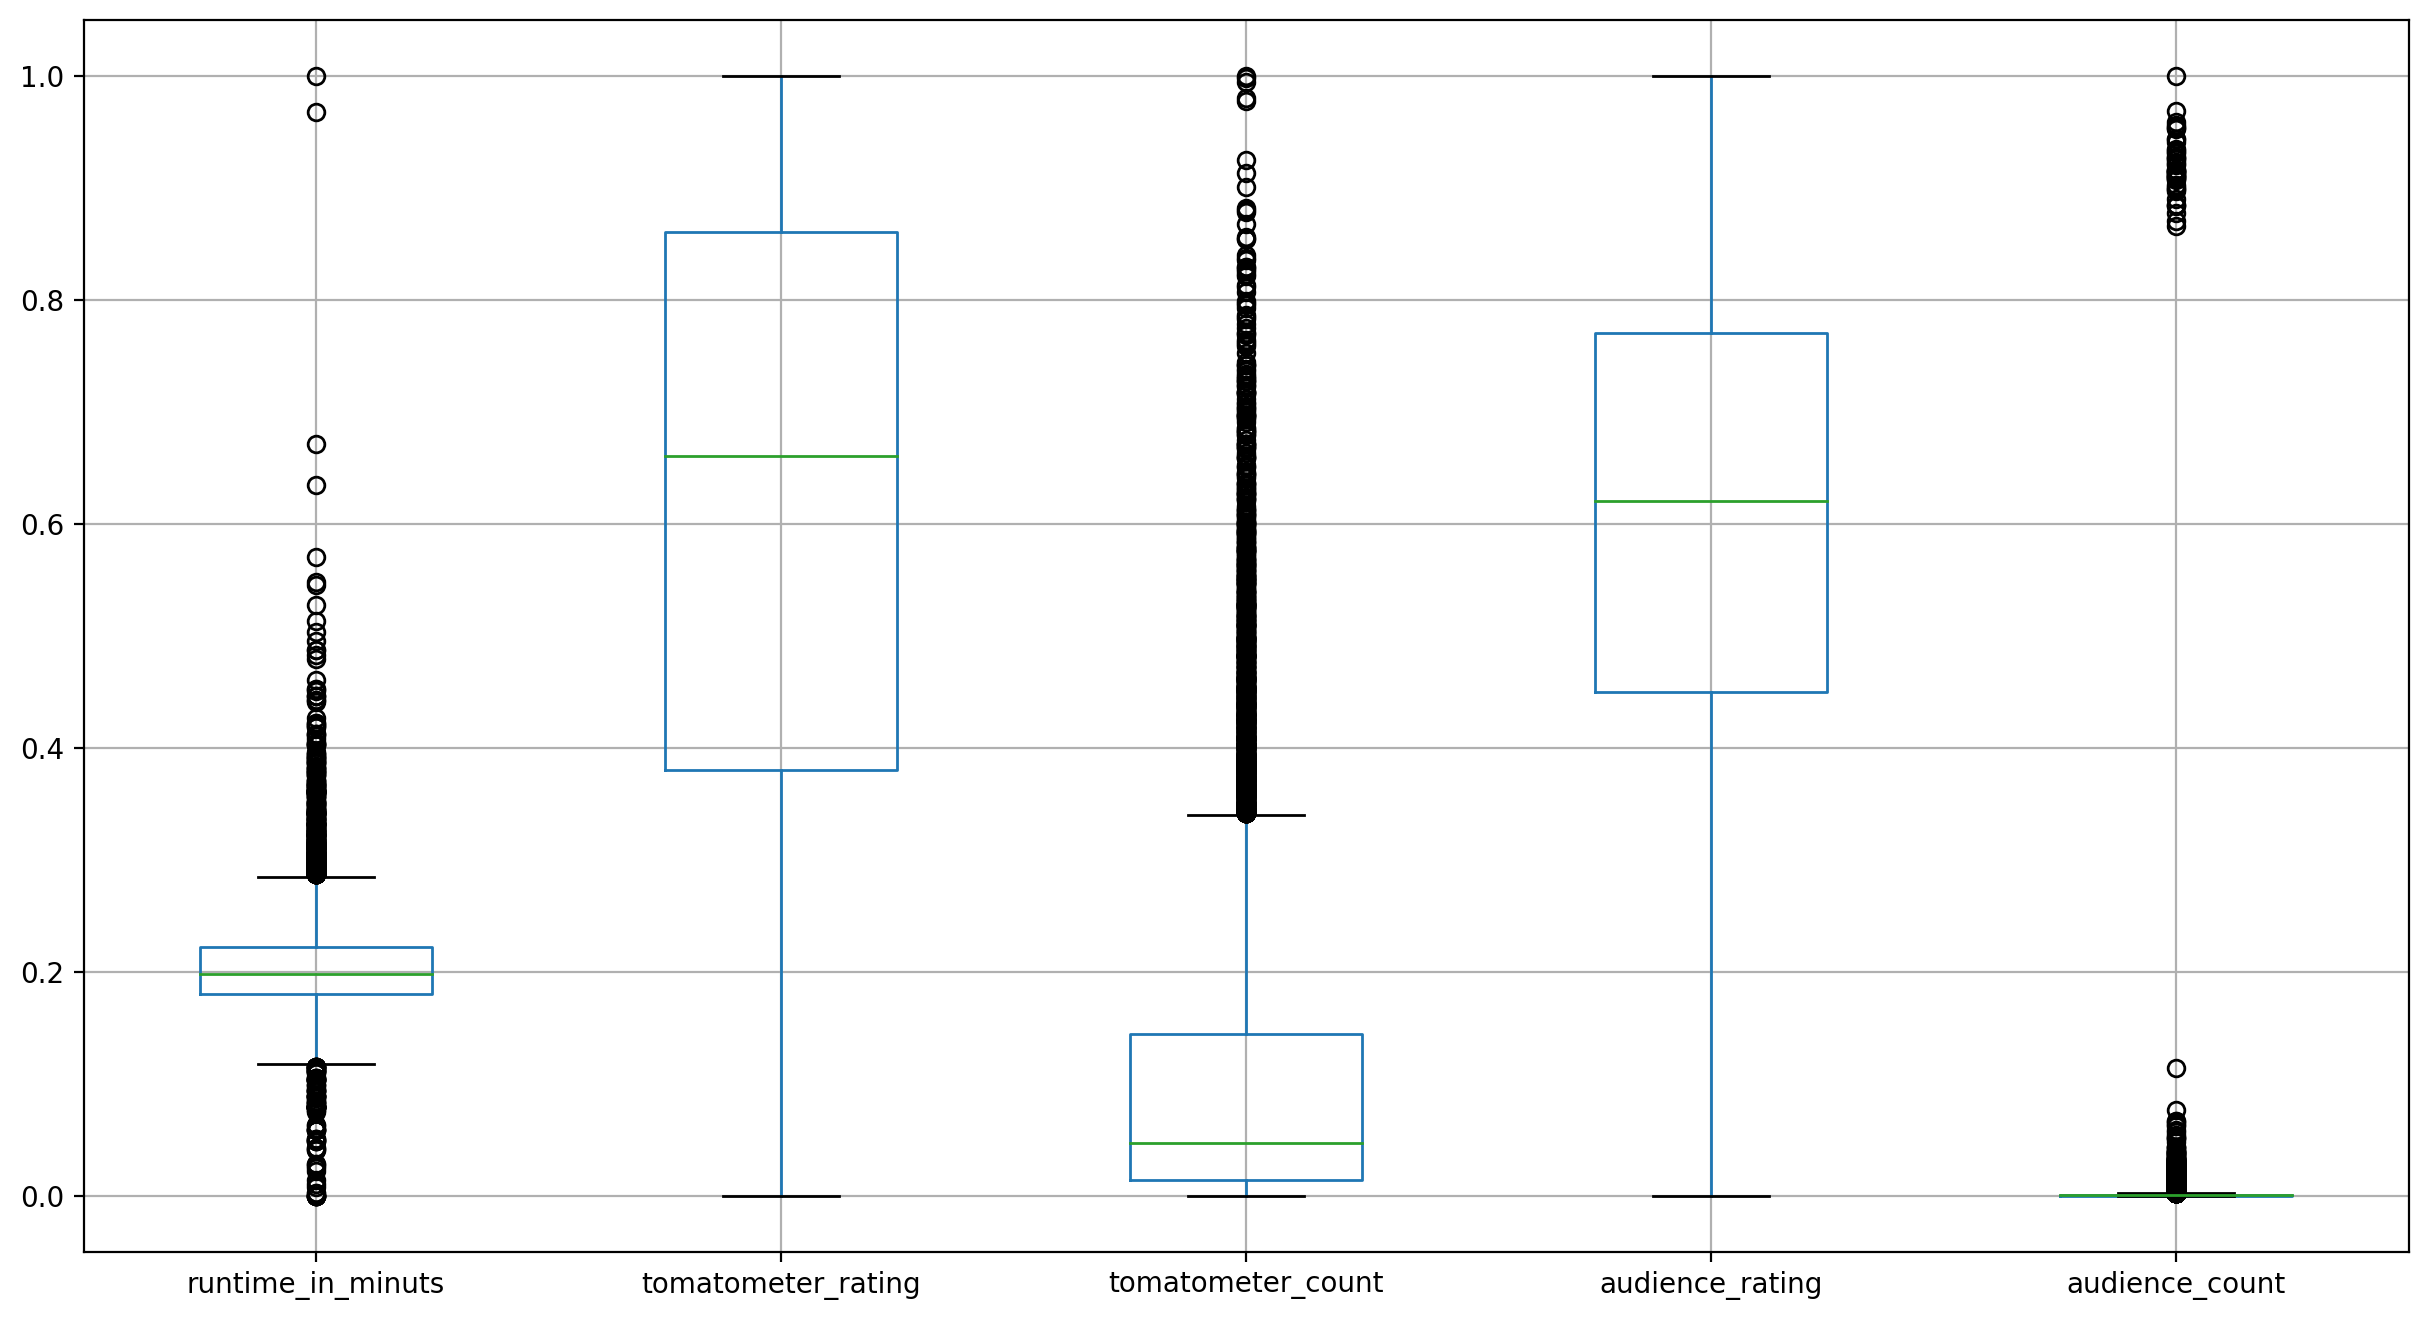

In [28]:
hb_num_scaled = pd.DataFrame(MinMaxScaler().fit_transform(hb_num),columns=hb_num.columns,index = hb_num.index)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,8), dpi = 200)
boxplots = hb_num_scaled.boxplot(return_type='axes',ax=ax)
plt.show()

In this part, I want to check which films are the outliers, for each of the numeric variables. As the boxplot show, `tomatometer_rating` and `audience_rating` don't have any type of outliers. The way to find this outliers were to estimate the whiskers of the boxplot. Observartions beyond these thresholds are the outliers.

In [29]:
df_quant = df.quantile([.25,.5,.75])

for col in df_quant.columns:  
  iqr = df_quant[col][.75] - df_quant[col][.25]
  lim_sup = df_quant[col][.75] + iqr * 1.5
  lim_inf = df_quant[col][.25] - iqr * 1.5
  
  aux = np.array([])
  
  for val in df[col]:
    if val > lim_sup:
      aux = np.append(aux, "superior")
    elif val < lim_inf:
      aux = np.append(aux, "inferior")
    else:
      aux = np.append(aux, "normal")
      
  df[col + "_bp"] = aux

C:\Users\Dell\AppData\Local\Temp\ipykernel_13048\1521465883.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_quant = df.quantile([.25,.5,.75])


## runtime_in_minuts

Most of the films classified with longer durations are correct. I can check this variable once again when comparing with the webscrapping database.

In [30]:
df_min_sup = df[df.runtime_in_minuts_bp == "superior"].sort_values("runtime_in_minuts", ascending= False)
cols = ["movie_title","movie_info","runtime_in_minuts","directors","cast"]
df_min_sup[cols]

,movie_title,movie_info,runtime_in_minuts,directors,cast
13589,Terror Tract,John Ritter stars in this three-part horror an...,2000.0,"Lance W. Dreesen, Clint Hutchinson, Clint Hutc...","John Ritter, Bryan Cranston, Rachel York, Carm..."
1133,Love on the Run,"In this film, Clark Gable and Franchot Tone pl...",496.0,W.S. Van Dyke,"Joan Crawford, Clark Gable, Franchot Tone, Reg..."
10474,Never Sleep Again: The Elm Street Legacy,Explore the origins of everyone's favorite hid...,480.0,"Andrew Kasch, Daniel Farrands","Heather Langenkamp, Mark Patton, Jennifer Rubi..."
4310,Carlos,"""Carlos"" tells the story of Ilich Ram├¡rez S├í...",333.0,Olivier Assayas,"Edgar Ramirez, Alexander Scheer, Nora von Wald..."
2092,1900 (Novecento),Director Bernardo Bertolucci's epic detailing ...,315.0,Bernardo Bertolucci,"Burt Lancaster, G├®rard Depardieu, Robert De N..."
...,...,...,...,...,...
3127,Avanti!,An uptight businessman travels to Italy where ...,143.0,Billy Wilder,"Jack Lemmon, Juliet Mills, Clive Revill, Edwar..."
3110,Auntie Mame,Auntie Mame began as a novel by Patrick Dennis...,143.0,Morton DaCosta,"Rosalind Russell, Forrest Tucker, Fred Clark, ..."
13071,Star Wars: Episode II - Attack of the Clones,The second prequel to the original Star Wars t...,143.0,George Lucas,"Hayden Christensen, Natalie Portman, Ewan McGr..."
15470,Transformers,The interstellar battle between the Autobots a...,143.0,Michael Bay,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ..."


This 2000 minute film length is compose of serveral shorter films. That's why it is so long.

In [23]:
df_max_runtime = df[df.runtime_in_minuts == 2000]
df_max_runtime

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minuts,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
13589,Terror Tract,John Ritter stars in this three-part horror an...,None,R,"Comedy, Horror, Mystery & Suspense","Lance W. Dreesen, Clint Hutchinson, Clint Hutc...",Clint Hutchison,"John Ritter, Bryan Cranston, Rachel York, Carm...",2000-10-18,2001-01-30,2000.0,USA Home Entertainment,Fresh,60.0,5,35.0,586.0


Doing a quick research, many of the "inferior" outliers doesn't have the appropiate duration measured. These films have 1 minute duration, thus it is important to check one again these variables.

In [31]:
df_min_inf = df[df.runtime_in_minuts_bp == "inferior"].sort_values("runtime_in_minuts", ascending= False)
cols = ["movie_title","movie_info","runtime_in_minuts","directors","cast"]
df_min_inf[cols]

,movie_title,movie_info,runtime_in_minuts,directors,cast
7952,In Between Days,"Aimie, a newly arrived Korean immigrant teenag...",58.0,So Yong Kim,"Jiseon Kim, Taegu Andy Kang, Bok-ja Kim, Gina ..."
7973,In Search of Blind Joe Death: The Saga of John...,Known as the father of American primitive guit...,58.0,James Cullingham,"John Fahey, Melody Fahey, Terry Robb, Pete Tow..."
12953,Speak The Music: Robert Mann And The Mysteries...,Robert Mann has been a vital force in the worl...,58.0,Allan Miller,"Robert Mann, Lucy Mann, Stephen Hough, Elliott..."
3060,Aziz Ansari: Live At Madison Square Garden,In his latest Netflix original standup special...,58.0,Aziz Ansari,Aziz Ansari
2739,The Amazing Transparent Man,A deranged scientist who needs radioactive che...,58.0,Edgar G. Ulmer,"Marguerite Chapman, Douglas Kennedy, James Gri..."
...,...,...,...,...,...
12060,Rory O'Shea Was Here,Michael is a twenty-four-year-old who has cere...,1.0,Damien O'Donnell,"James McAvoy, Steven Robertson, Romola Garai, ..."
394,The Border,The lives of a Mexican mother attempting to en...,1.0,Tony Richardson,"Jack Nicholson, Harvey Keitel, Valerie Perrine..."
7419,Hellraiser: Hellworld,Clive Barker's sinister creation Pinhead retur...,1.0,Rick Bota,"Doug Bradley, Katheryn Winnick, Henry Cavill, ..."
7418,Hellraiser: Hellseeker,When the puzzle box is solved and the gates of...,1.0,Rick Bota,"Ashley Laurence, Doug Bradley, Dean Winters, K..."


In this variable, some movies had more critics review. The exact reason why these films got more reviews are unknown: with Avengers:Endgame as an exception, this are not the well know blockboster movies.

In [32]:
df_tomat_count = df[df.tomatometer_count_bp != "normal"].sort_values("tomatometer_count", ascending= False)
cols = ["movie_title","movie_info","tomatometer_count","directors","cast"]
df_tomat_count[cols]

,movie_title,movie_info,tomatometer_count,directors,cast
4290,Captain Marvel,The story follows Carol Danvers as she becomes...,497,"Anna Boden, Ryan Fleck","Brie Larson, Samuel L. Jackson, Ben Mendelsohn..."
2381,A Star Is Born,"In ""A Star Is Born,"" Bradley Cooper and Lady G...",496,Bradley Cooper,"Lady Gaga, Bradley Cooper, Sam Elliott, Andrew..."
15783,Us,Haunted by an unexplainable and unresolved tra...,494,Jordan Peele,"Lupita Nyong'o, Winston Duke, Elisabeth Moss, ..."
3705,Black Panther,"""Black Panther"" follows T'Challa who, after th...",487,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny..."
3133,Avengers: Endgame,The grave course of events set in motion by Th...,486,"Joe Russo, Anthony Russo","Robert Downey Jr., Mark Ruffalo, Scarlett Joha..."
...,...,...,...,...,...
10401,Napoleon Dynamite,"The directorial debut of filmmaker Jared Hess,...",173,Jared Hess,"Jon Heder, Jon Gries, Aaron Ruell, Efren Ramir..."
4714,Cold Pursuit,"COLD PURSUIT, an action thriller infused with ...",173,Hans Petter Moland,"Liam Neeson, Emmy Rossum, Laura Dern, Tom Bate..."
1706,Rent,"In New York's East Village, a group of bohemia...",173,Chris Columbus,"Anthony Rapp, Adam Pascal, Rosario Dawson, Jes..."
4124,The Bucket List,Jack Nicholson and Morgan Freeman star as two ...,173,Rob Reiner,"Jack Nicholson, Morgan Freeman, Sean Hayes, Be..."


As previously mentioned, most of the films are well know to have to have huge box-office records.

In [33]:
df.sort_values("audience_count_bp", ascending= False).head()
df_audience_count = df[df.audience_count_bp != "normal"].sort_values("audience_count", ascending= False)
cols = ["movie_title","movie_info","audience_count","directors","cast"]
df_audience_count[cols]

,movie_title,movie_info,audience_count,directors,cast
15329,Titanic,This spectacular epic re-creates the ill-fated...,35797635.0,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K..."
14534,The Lord of the Rings: The Return of the King,The final battle for Middle-earth begins. Frod...,34679773.0,Peter Jackson,"Elijah Wood, Sean Astin, Ian McKellen, Andy Se..."
12983,Spider-Man,After incorporating elements of comic book sty...,34297354.0,Sam Raimi,"Tobey Maguire, Kirsten Dunst, Willem Dafoe, Ja..."
12583,Shrek 2,After battling a fire-breathing dragon and the...,34232524.0,"Conrad Vernon, Andrew Adamson, Kelly Asbury","Mike Myers, Eddie Murphy, Cameron Diaz, Julie ..."
7284,Harry Potter and the Goblet of Fire,"Directed by Mike Newell, the fourth installmen...",34153607.0,Mike Newell,"Daniel Radcliffe, Rupert Grint, Emma Watson, R..."
...,...,...,...,...,...
14895,The Smurfs,The Smurfs make their first 3D trip to the big...,70814.0,Raja Gosnell,"Neil Patrick Harris, Sof├¡a Vergara, Jayma May..."
500,Dune,David Lynch wades through dark waters in his a...,70749.0,David Lynch,"Francesca Annis, Jos├® Ferrer, Leonardo Cimino..."
8983,Legend of the Guardians: The Owls of Ga'Hoole,Acclaimed filmmaker Zack Snyder makes his anim...,70721.0,Zack Snyder,"Abbie Cornish, Miriam Margolyes, Helen Mirren,..."
4278,Capitalism: A Love Story,Michael Moore returns to controversial territo...,70692.0,Michael Moore,"Thora Birch, Michael Moore, William Black, Jim..."


### Distribution graphs

## runtime_in_minuts

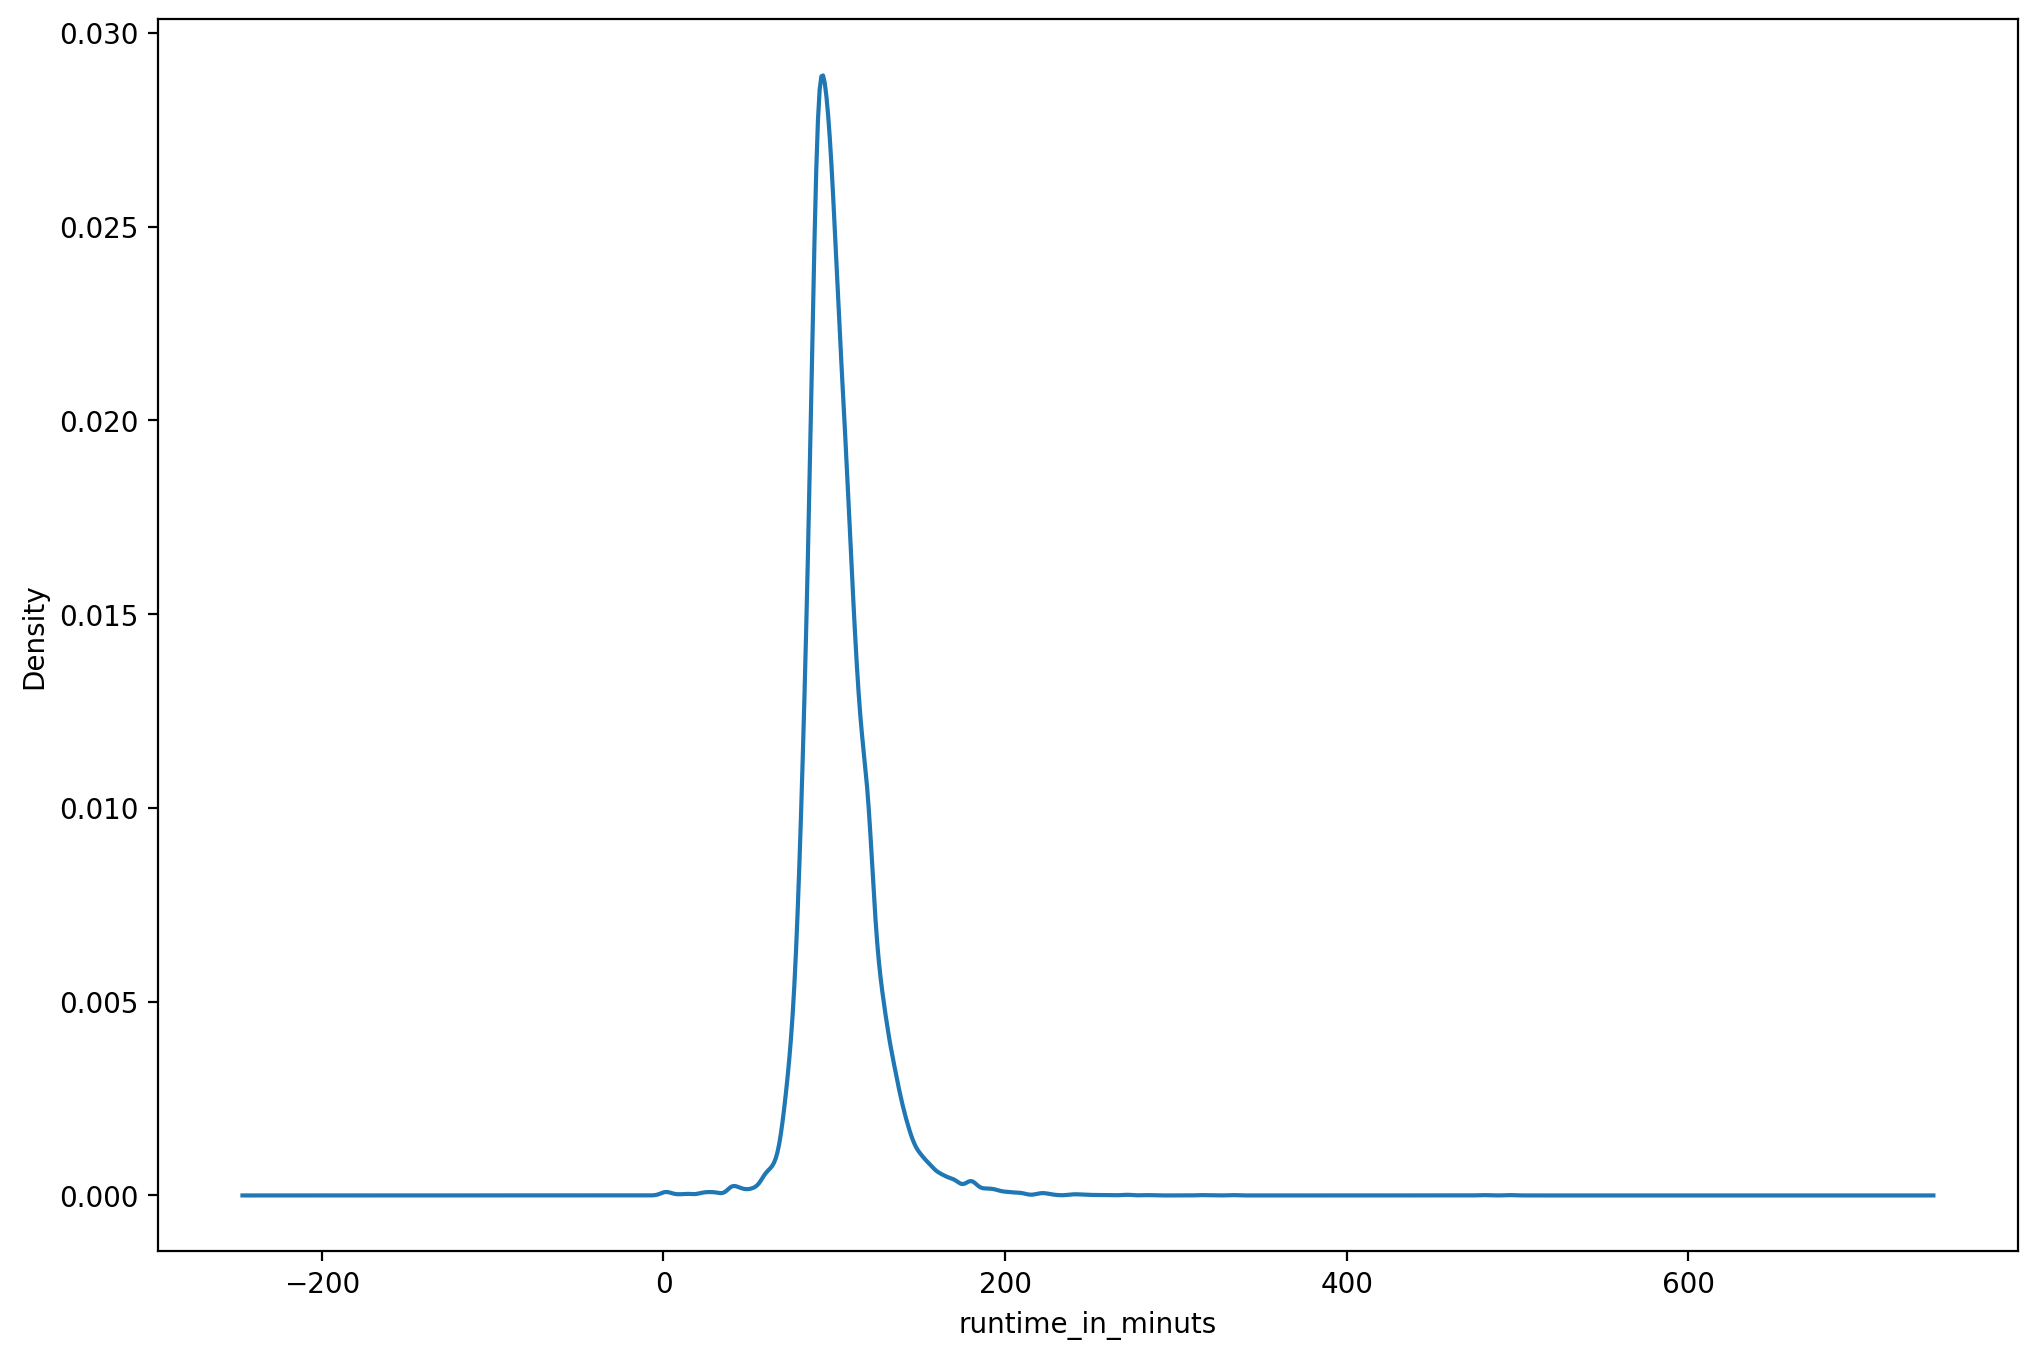

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,8), dpi = 200)
col = "runtime_in_minuts"
ax.set_xlabel(col)
densidad = df_no_2000min[col].plot(kind='density',ax = ax)
plt.show()

## tomatometer_rating

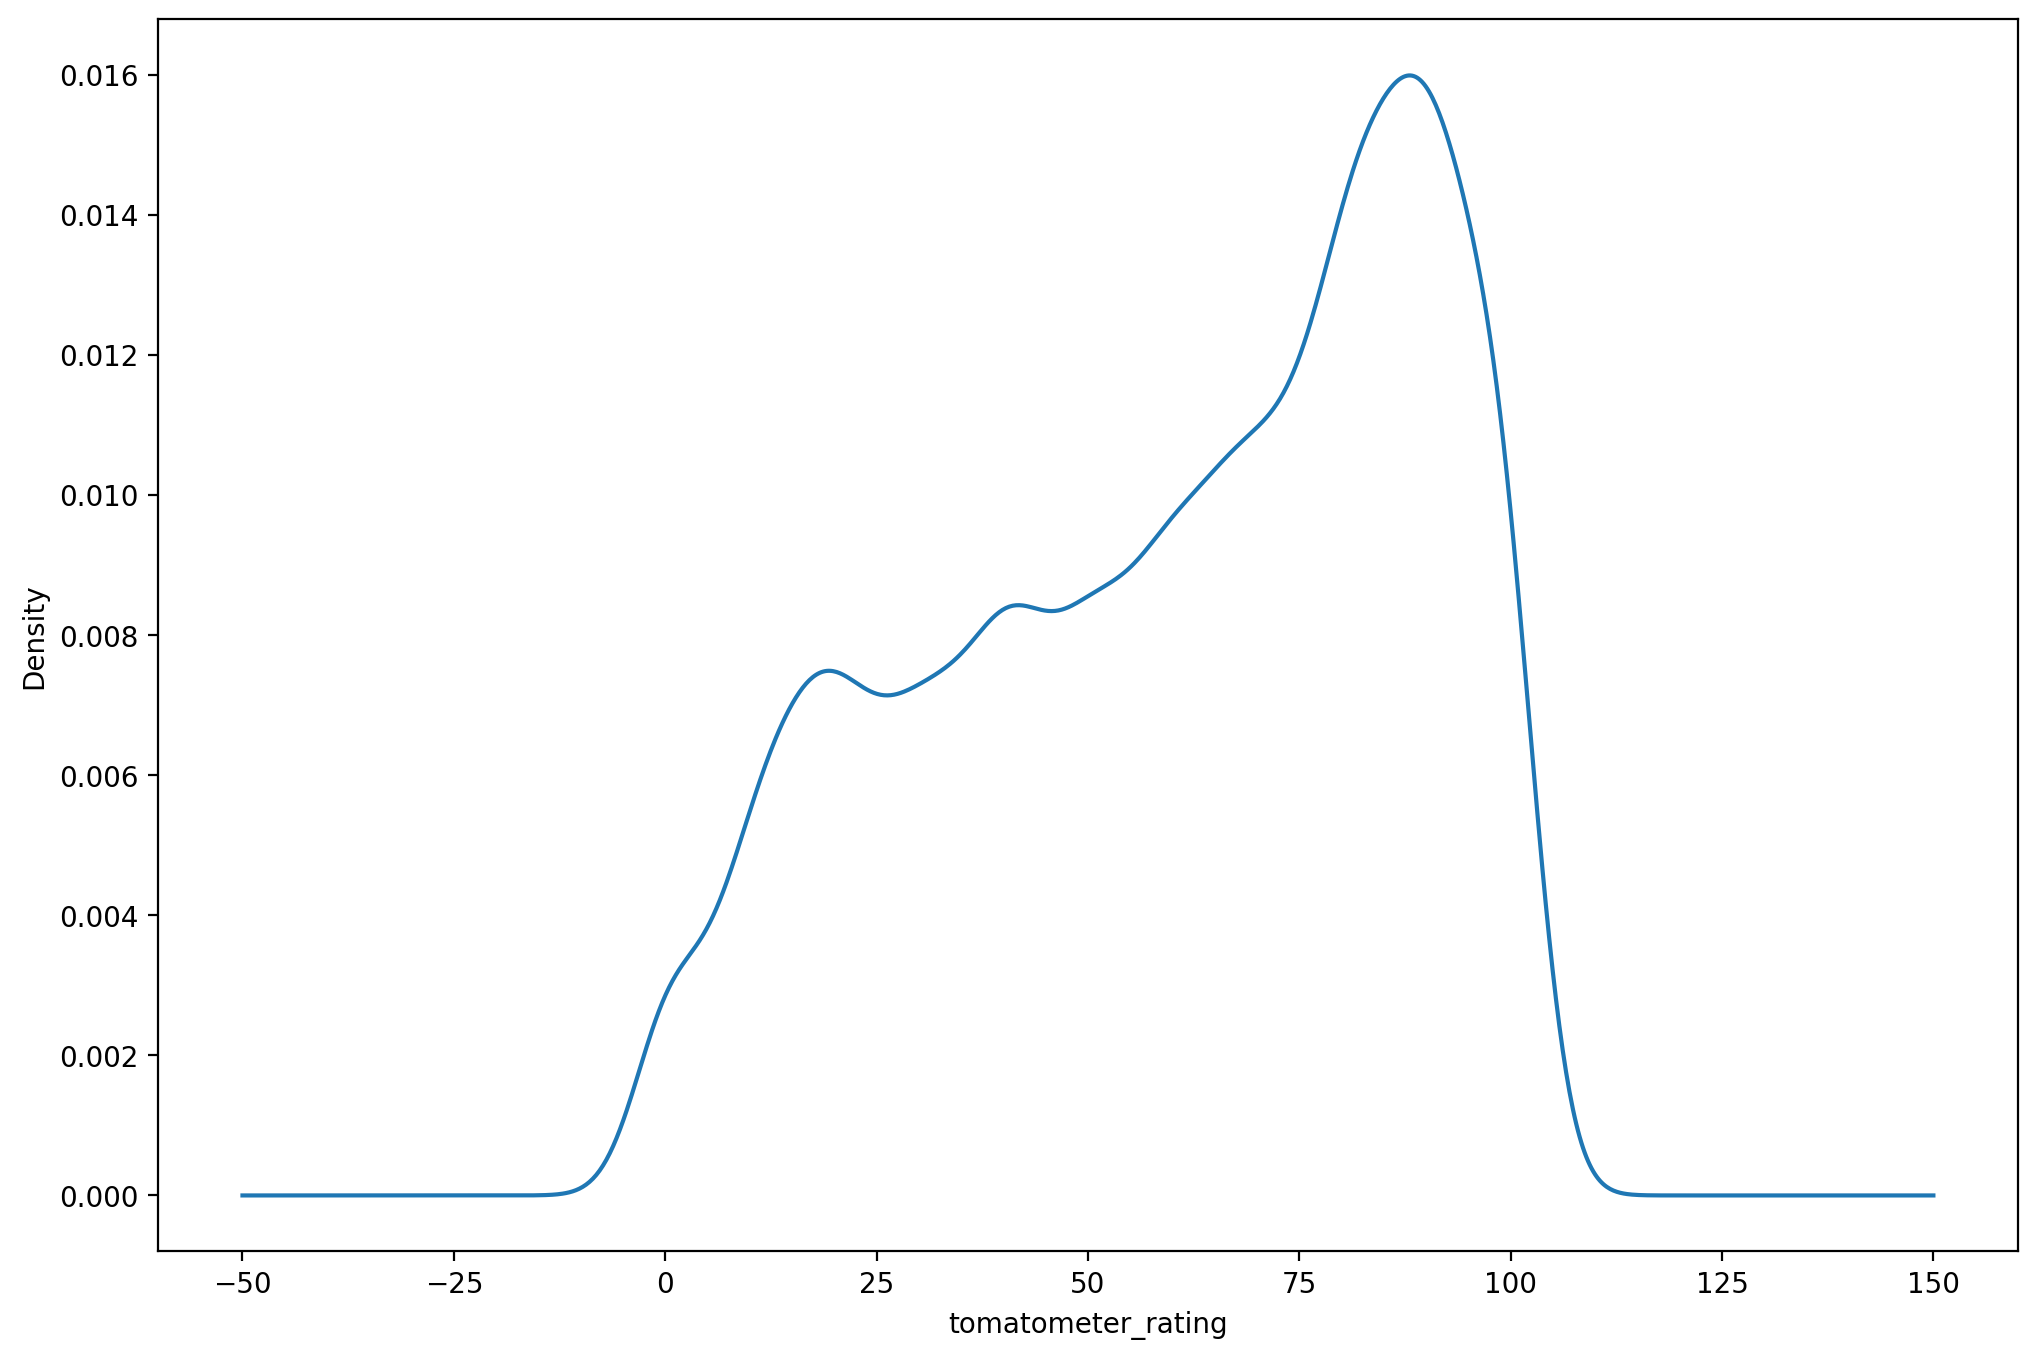

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,8), dpi = 200)
col = "tomatometer_rating"
ax.set_xlabel(col)
densidad = df[col].plot(kind='density',ax = ax)
plt.show()

## tomatometer_count

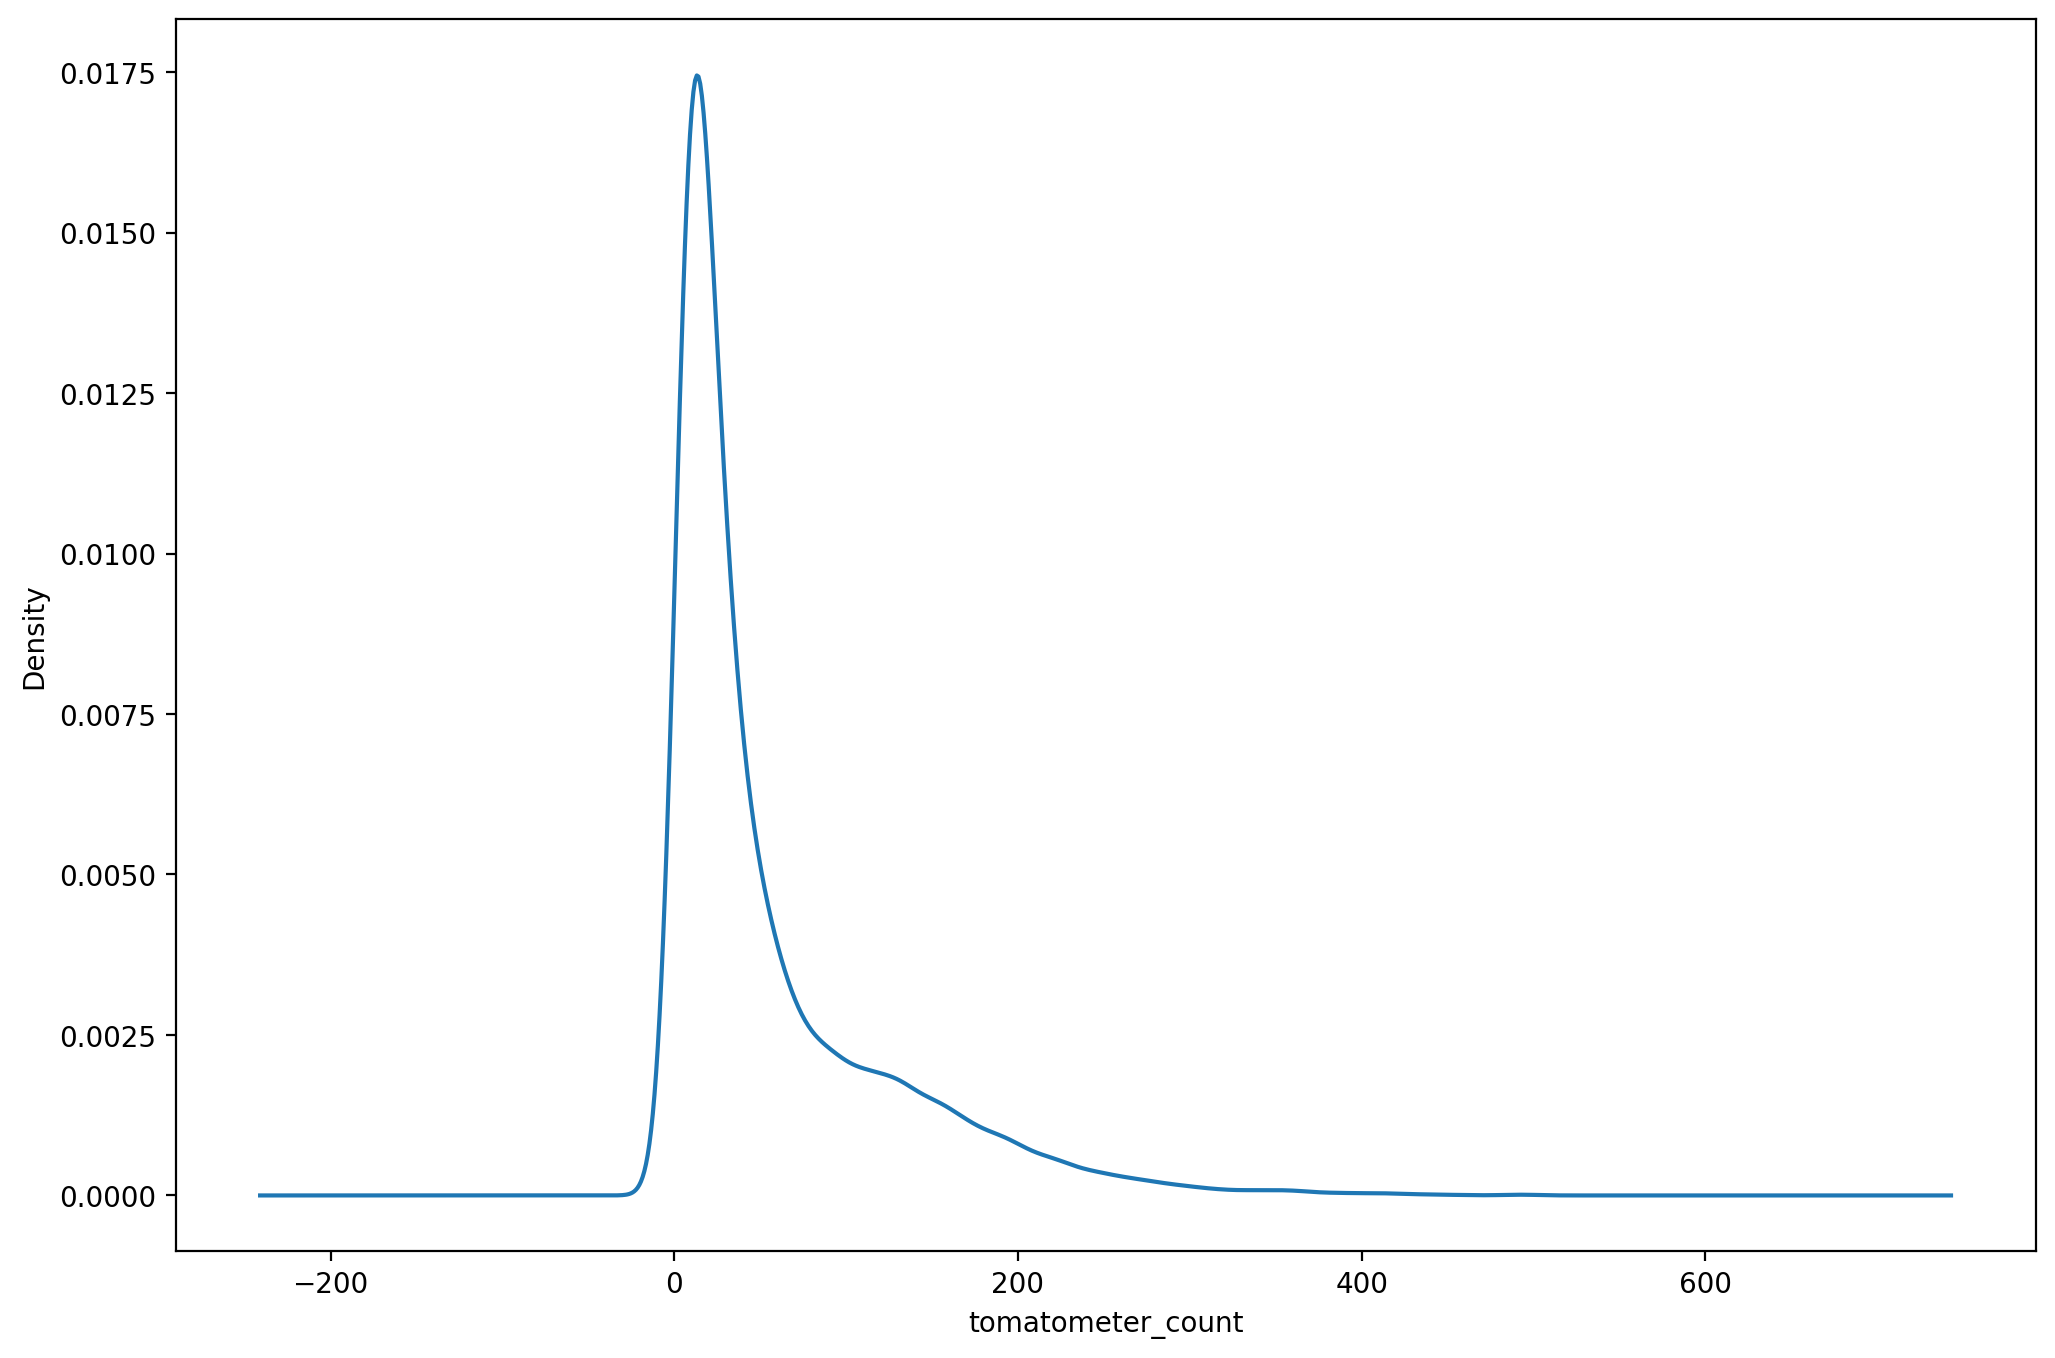

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,8), dpi = 200)
col = "tomatometer_count"
ax.set_xlabel(col)
densidad = df[col].plot(kind='density',ax = ax)
plt.show()

## audience_rating

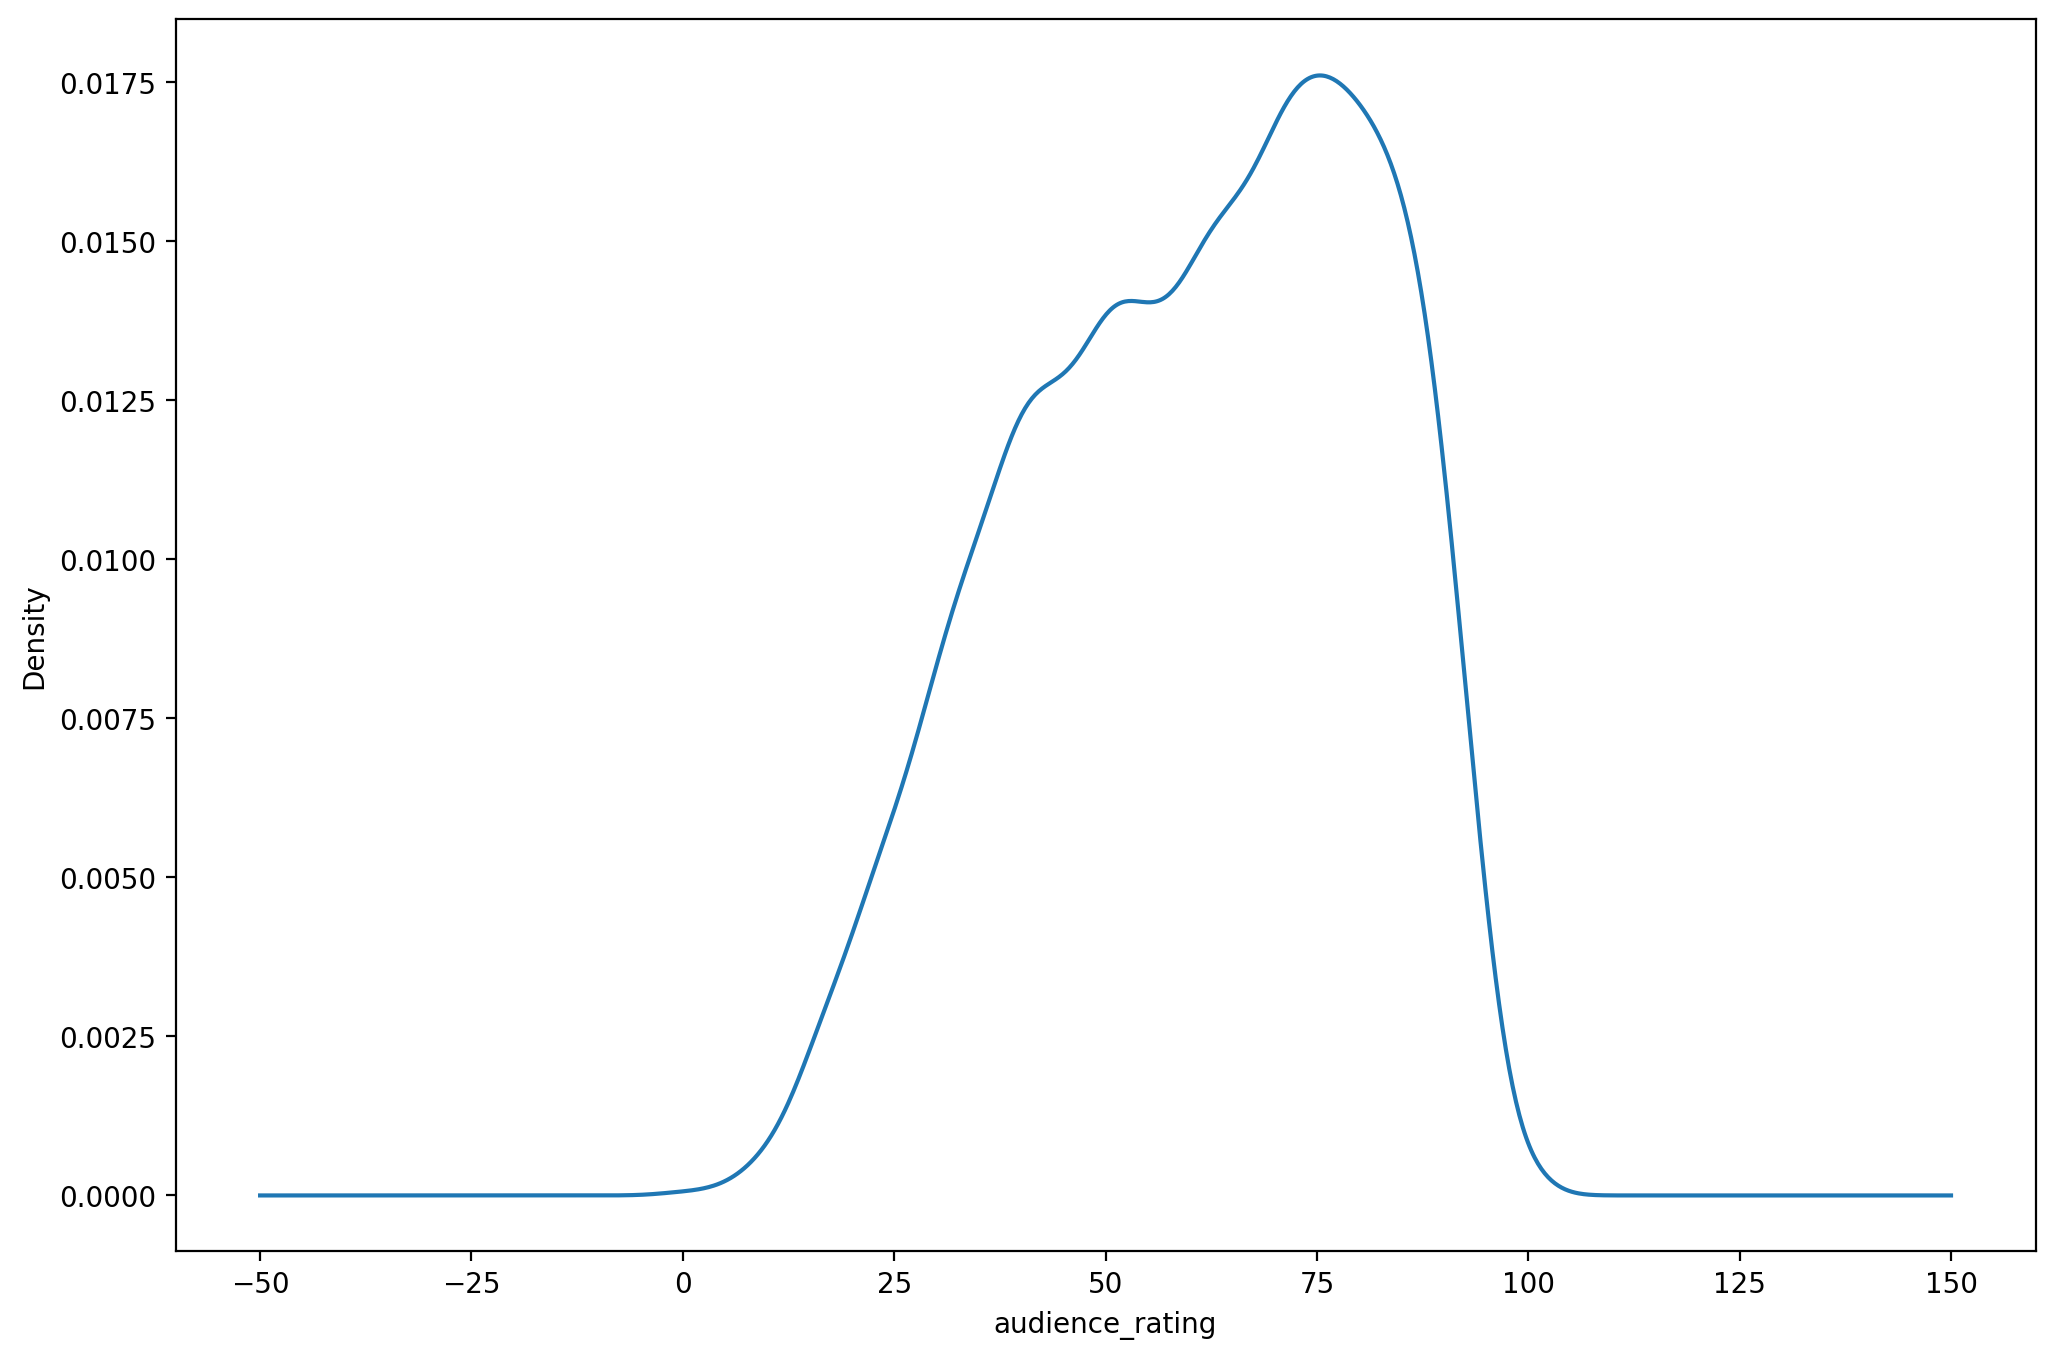

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,8), dpi = 200)
col = "audience_rating"
ax.set_xlabel(col)
densidad = df[col].plot(kind='density',ax = ax)
plt.show()

## audience_count

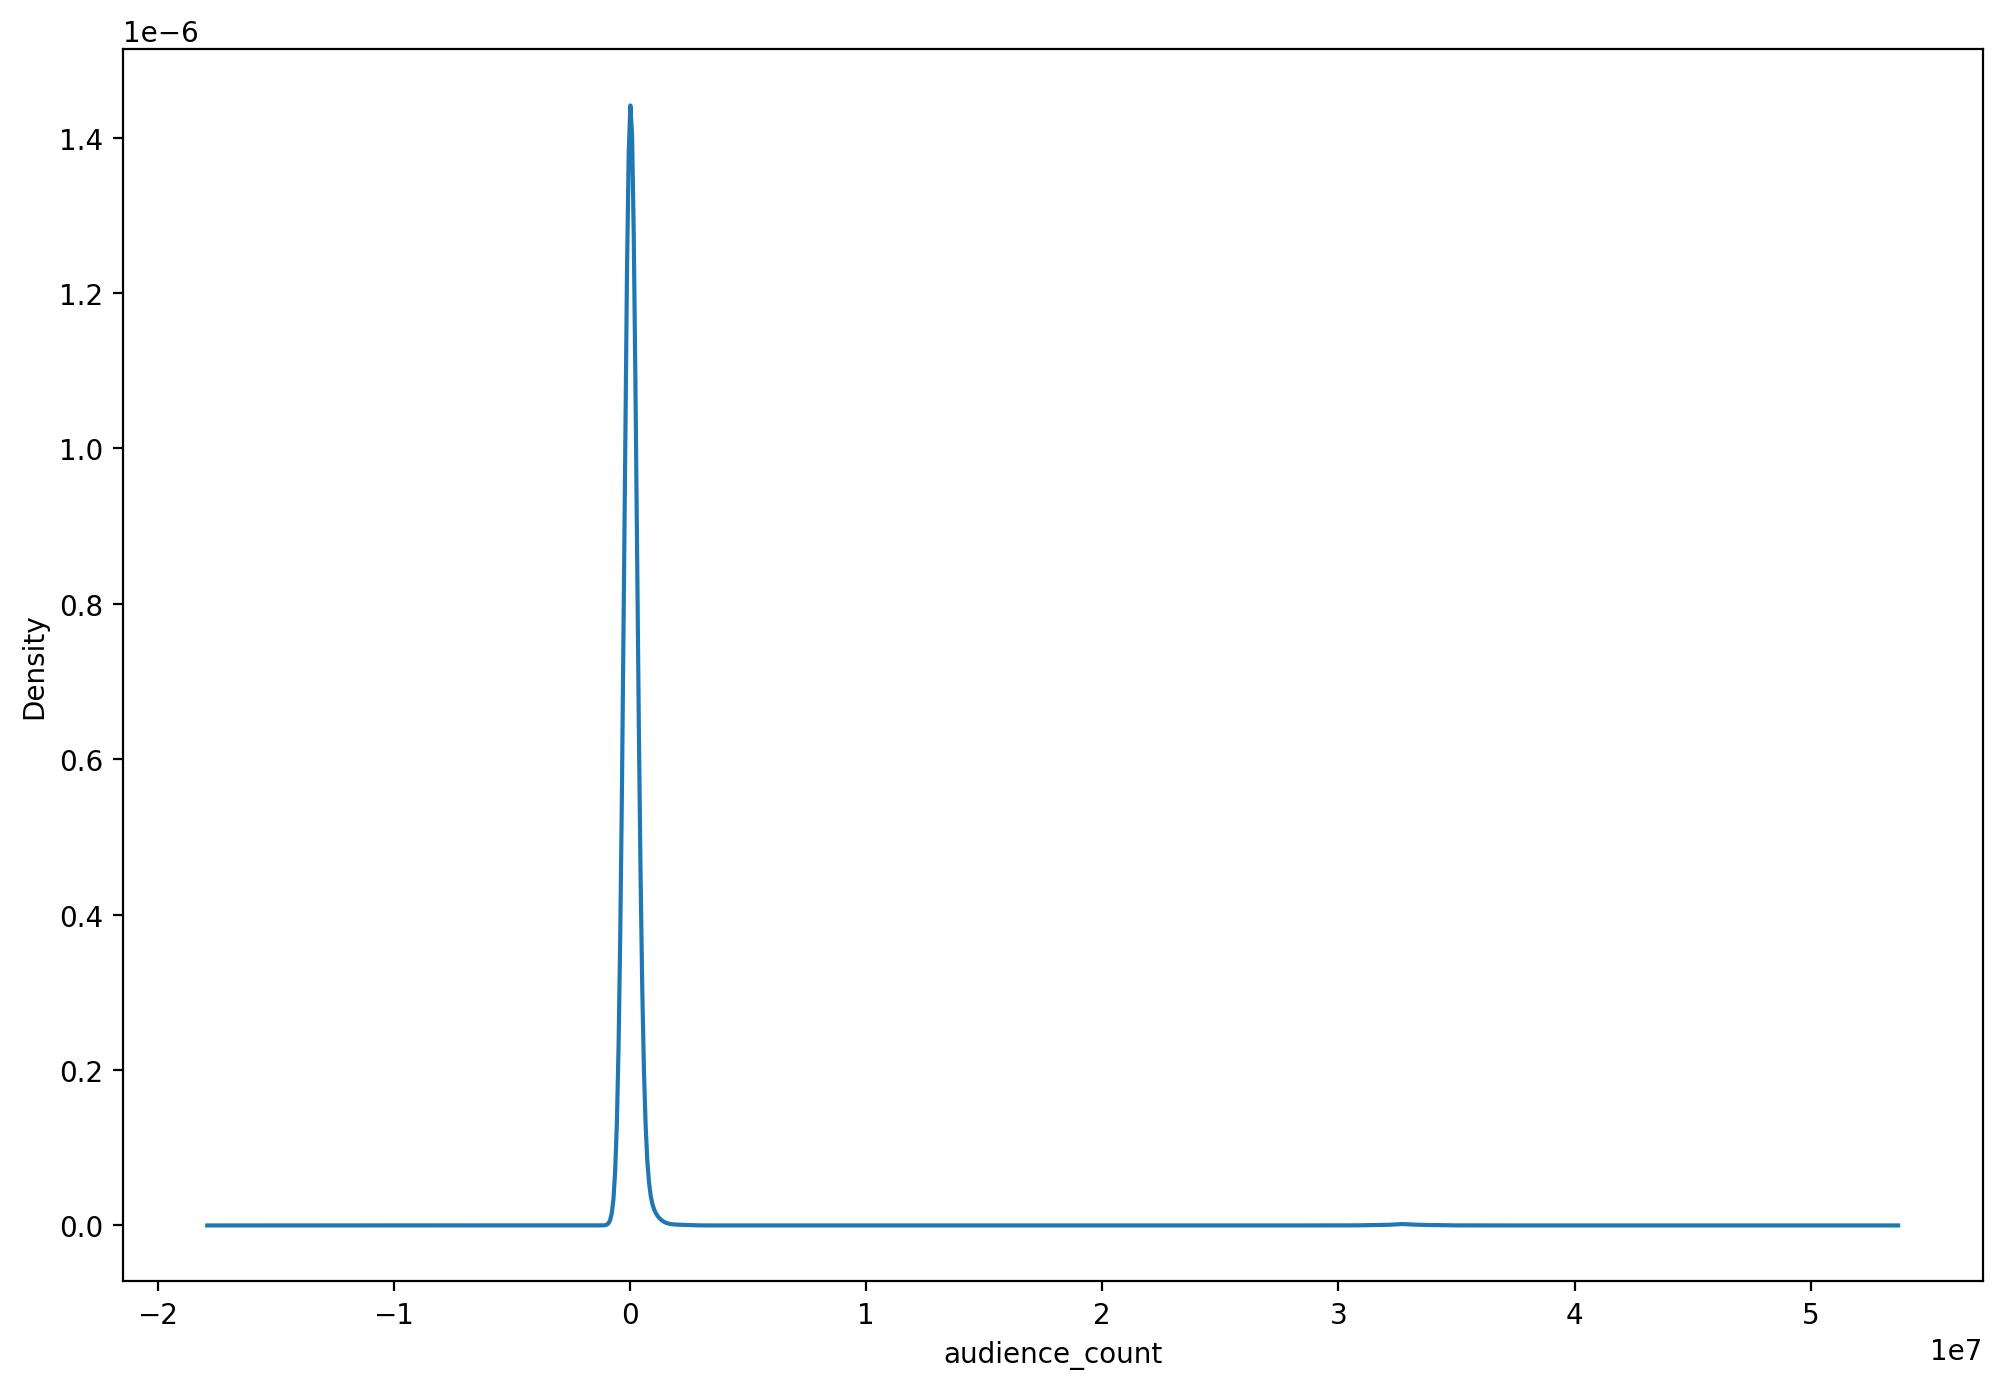

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,8), dpi = 200)
col = "audience_count"
ax.set_xlabel(col)
densidad = df[col].plot(kind='density',ax = ax)
plt.show()

### Correlation

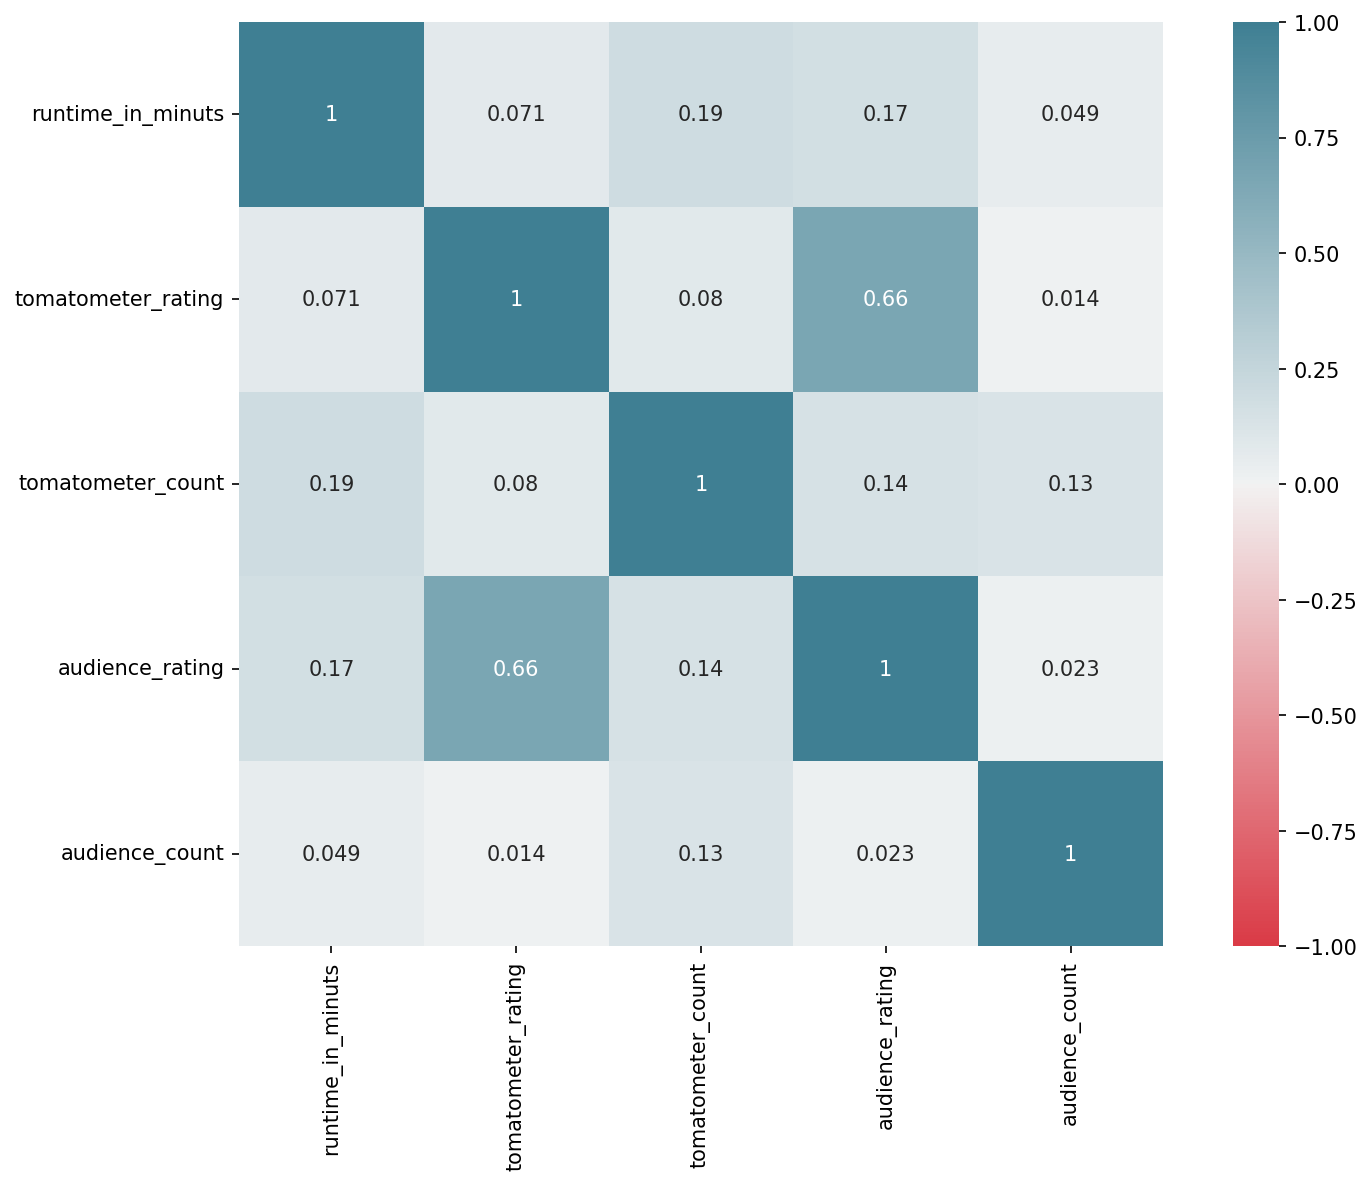

In [39]:
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12, 8), dpi = 150)
paleta = sns.diverging_palette(220, 10,as_cmap=True).reversed()
sns.heatmap(corr, vmin= -1, vmax=1, cmap= paleta,
            square=True, annot=True, ax=ax)
plt.show()